In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import missingno as msno
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import levene
from scipy.stats import shapiro
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import scale
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve

# DATA

In [7]:
Personality = pd.read_csv("C:/Users/nikhil/Downloads/psyc.csv")
Personality["Total"] = Personality["openness"] + Personality["neuroticism"] + \
Personality["conscientiousness"] + Personality["agreeableness"] + Personality["extraversion"]

data = Personality.copy()

dataV = Personality.copy() # for VISUALIZATION
dataV["gender"] = pd.Categorical(dataV["gender"])
dataV["openness"] = pd.Categorical(dataV["openness"])
dataV["neuroticism"] = pd.Categorical(dataV["neuroticism"])
dataV["conscientiousness"] = pd.Categorical(dataV["conscientiousness"])
dataV["agreeableness"] = pd.Categorical(dataV["agreeableness"])
dataV["extraversion"] = pd.Categorical(dataV["extraversion"])
dataV["Personality"] = pd.Categorical(dataV["Personality"])

df = data.select_dtypes(include=["float64","int64","int32"])

# INFORMATION

In [14]:
print(data.shape)
print("----"*30)
print(data.columns)
print("----"*30)
print(data.info())
print("----"*30)
print(data.describe().T)
print("----"*30)
print(data["gender"].value_counts())
print("----"*30)
print(data["Personality"].value_counts())
print("----"*30)
print(df.corr())
print("----"*30)
print(data.groupby(["gender","Personality"])["openness"].mean())
print("----"*30)
print(data.groupby(["gender","Personality"])["neuroticism"].mean())
print("----"*30)
print(data.groupby(["gender","Personality"])["conscientiousness"].mean())
print("----"*30)
print(data.groupby(["gender","Personality"])["agreeableness"].mean())
print("----"*30)
print(data.groupby(["gender","Personality"])["extraversion"].mean())
print("----"*30)
print(data.groupby(["Personality","Total"])["openness"].mean())
print("----"*30)
print(data.groupby(["Personality","Total"])["neuroticism"].mean())
print("----"*30)
print(data.groupby(["Personality","Total"])["conscientiousness"].mean())
print("----"*30)
print(data.groupby(["Personality","Total"])["agreeableness"].mean())
print("----"*30)
print(data.groupby(["Personality","Total"])["extraversion"].mean())
print("----"*30)
print(data.isnull().sum())

(315, 9)
------------------------------------------------------------------------------------------------------------------------
Index(['gender', 'age', 'openness', 'neuroticism', 'conscientiousness',
       'agreeableness', 'extraversion', 'Personality', 'Total'],
      dtype='object')
------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gender             315 non-null    object
 1   age                315 non-null    int64 
 2   openness           315 non-null    int64 
 3   neuroticism        315 non-null    int64 
 4   conscientiousness  315 non-null    int64 
 5   agreeableness      315 non-null    int64 
 6   extraversion       315 non-null    int64 
 7   Personality        315 non-null    object
 8   Total      

# VISUALIZATION

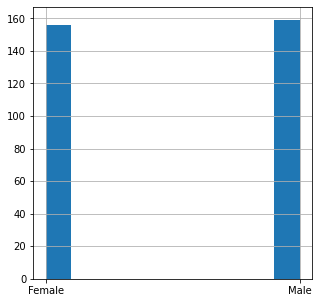

In [15]:
dataV["gender"].hist(figsize=(5,5))
plt.show()

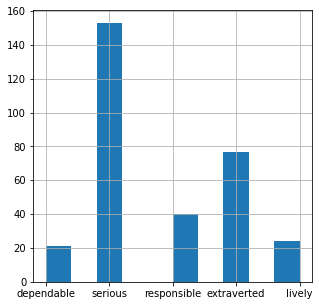

In [16]:
dataV["Personality"].hist(figsize=(5,5))
plt.show()

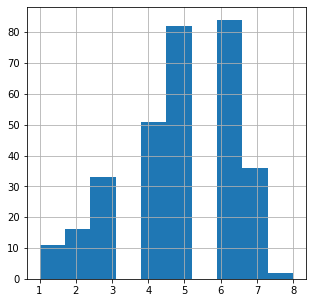

In [17]:
dataV["openness"].hist(figsize=(5,5))
plt.show()

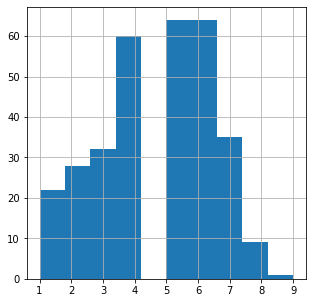

In [18]:
dataV["neuroticism"].hist(figsize=(5,5))
plt.show()

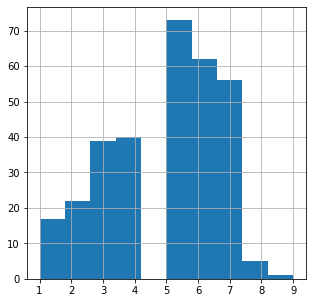

In [19]:
dataV["conscientiousness"].hist(figsize=(5,5))
plt.show()

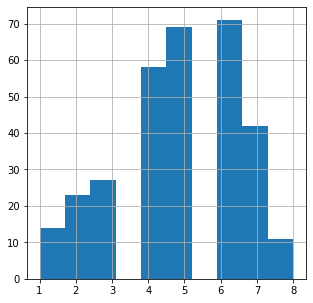

In [20]:
dataV["agreeableness"].hist(figsize=(5,5))
plt.show()

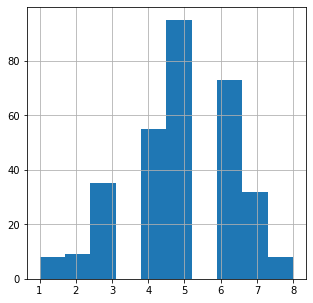

In [21]:
dataV["extraversion"].hist(figsize=(5,5))
plt.show()

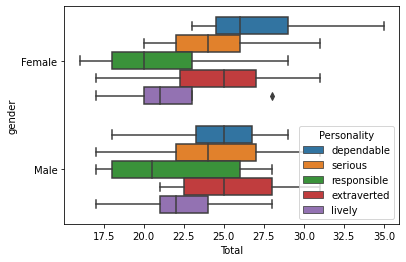

In [29]:
sns.boxplot(x="Total",y="gender",hue="Personality",data=data)
plt.show()

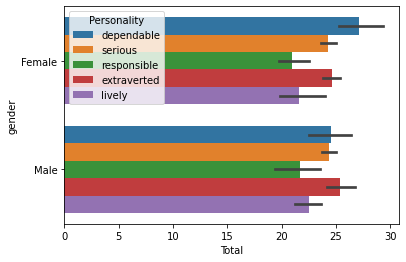

In [31]:
sns.barplot(x="Total",y="gender",hue="Personality",data=data)
plt.show()

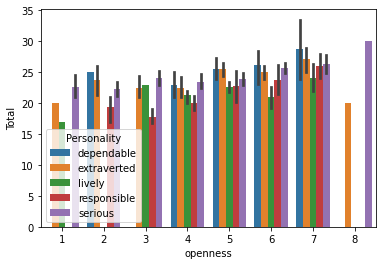

In [35]:
sns.barplot(x="openness",y="Total",hue="Personality",data=dataV)
plt.show()

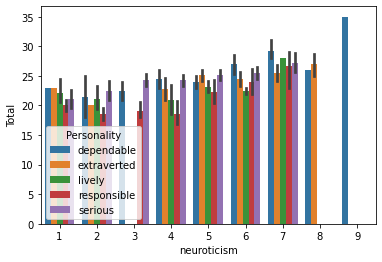

In [36]:
sns.barplot(x="neuroticism",y="Total",hue="Personality",data=dataV)
plt.show()

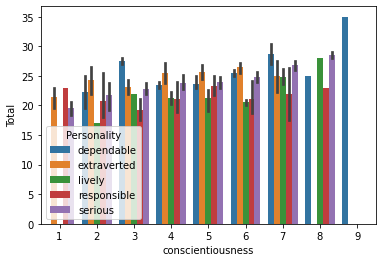

In [37]:
sns.barplot(x="conscientiousness",y="Total",hue="Personality",data=dataV)
plt.show()

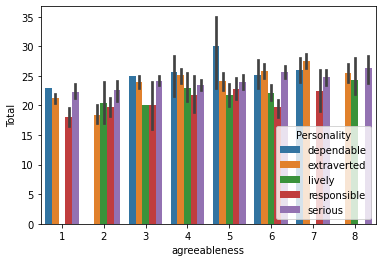

In [38]:
sns.barplot(x="agreeableness",y="Total",hue="Personality",data=dataV)
plt.show()

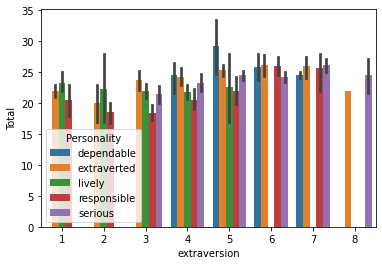

In [39]:
sns.barplot(x="extraversion",y="Total",hue="Personality",data=dataV)
plt.show()

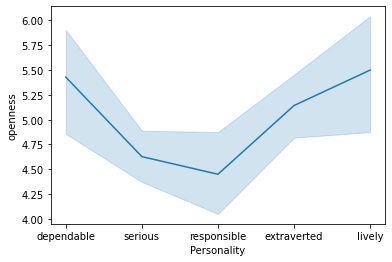

In [43]:
sns.lineplot(x="Personality",y="openness",data=data)
plt.show()

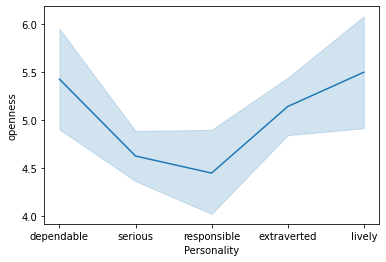

In [44]:
sns.lineplot(x="Personality",y="openness",data=data)
plt.show()

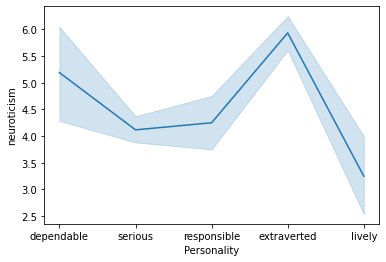

In [45]:
sns.lineplot(x="Personality",y="neuroticism",data=data)
plt.show()

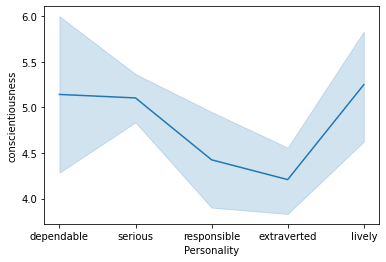

In [46]:
sns.lineplot(x="Personality",y="conscientiousness",data=data)
plt.show()

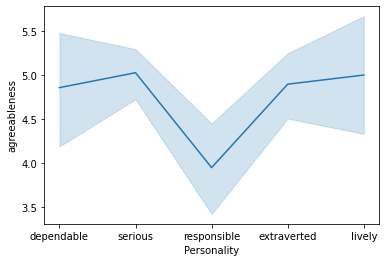

In [47]:
sns.lineplot(x="Personality",y="agreeableness",data=data)
plt.show()

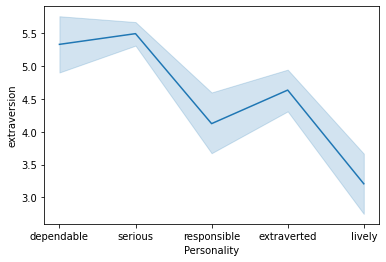

In [48]:
sns.lineplot(x="Personality",y="extraversion",data=data)
plt.show()

# CORRELATION VISUALIZATION 

In [52]:
features = ["openness","neuroticism","conscientiousness","agreeableness","extraversion"]

In [58]:
corrPearson = data[features].corr(method="pearson")
corrSpearman = data[features].corr(method="spearman")

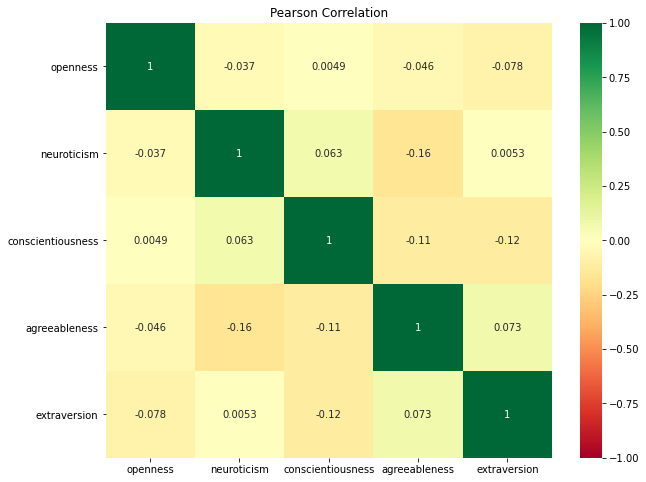

In [59]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(corrPearson,annot=True,cmap='RdYlGn', vmin=-1, vmax=+1)

plt.title("Pearson Correlation")
plt.show()

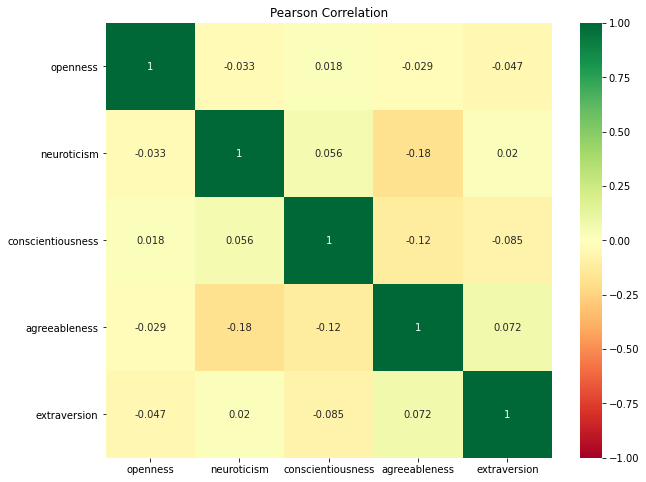

In [60]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(corrSpearman,annot=True,cmap='RdYlGn', vmin=-1, vmax=+1)

plt.title("Pearson Correlation")
plt.show()

# NORMALITY

In [61]:
for i in features:
    print(i,"----------")
    print(shapiro(data[i]))

openness ----------
ShapiroResult(statistic=0.9279025793075562, pvalue=3.3038738411761415e-11)
neuroticism ----------
ShapiroResult(statistic=0.9523547887802124, pvalue=1.3906847229350205e-08)
conscientiousness ----------
ShapiroResult(statistic=0.938087522983551, pvalue=3.393595404688199e-10)
agreeableness ----------
ShapiroResult(statistic=0.9465893507003784, pvalue=2.8825972719914716e-09)
extraversion ----------
ShapiroResult(statistic=0.9462653994560242, pvalue=2.647000396649446e-09)


# HOMOGENEITY

In [62]:
print(levene(data["openness"],data["neuroticism"],data["conscientiousness"],
             data["agreeableness"],data["extraversion"]))

LeveneResult(statistic=6.874371499889138, pvalue=1.7474835327816553e-05)


# CONVERSION

In [64]:
encode = LabelEncoder()

In [66]:
columns = ["gender","Personality"]
for i in columns:
    print(data[i].value_counts())
    print("----"*30)
    data[i] = encode.fit_transform(data[i])
    print(data[i].value_counts())
    print("----"*30)

Male      159
Female    156
Name: gender, dtype: int64
------------------------------------------------------------------------------------------------------------------------
1    159
0    156
Name: gender, dtype: int64
------------------------------------------------------------------------------------------------------------------------
serious        153
extraverted     77
responsible     40
lively          24
dependable      21
Name: Personality, dtype: int64
------------------------------------------------------------------------------------------------------------------------
4    153
1     77
3     40
2     24
0     21
Name: Personality, dtype: int64
------------------------------------------------------------------------------------------------------------------------


## Personality

* Dependable - 0
* Extraverted - 1
* Lively - 2
* Responsible - 3
* Serious - 4

## Gender

* Female - 0
* Male - 1

In [67]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   gender             315 non-null    int64
 1   age                315 non-null    int64
 2   openness           315 non-null    int64
 3   neuroticism        315 non-null    int64
 4   conscientiousness  315 non-null    int64
 5   agreeableness      315 non-null    int64
 6   extraversion       315 non-null    int64
 7   Personality        315 non-null    int64
 8   Total              315 non-null    int64
dtypes: int64(9)
memory usage: 22.3 KB
None


In [77]:
filterwarnings("ignore")

# X & Y FOR MODELS

In [68]:
x = data.drop("Personality",axis=1)
y = data["Personality"]
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=0.2,random_state=123)

# OLS MODELS & ERROR & TUNING & PREDICT

In [69]:
ols = sm.OLS(yTrain,xTrain).fit()
predict = ols.predict(xTest)
print(ols.summary())

                                 OLS Regression Results                                
Dep. Variable:            Personality   R-squared (uncentered):                   0.838
Model:                            OLS   Adj. R-squared (uncentered):              0.833
Method:                 Least Squares   F-statistic:                              180.5
Date:                Thu, 01 Apr 2021   Prob (F-statistic):                    6.69e-93
Time:                        14:55:03   Log-Likelihood:                         -413.48
No. Observations:                 252   AIC:                                      841.0
Df Residuals:                     245   BIC:                                      865.7
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

# LINEAR MODELS & ERROR & TUNING & PREDICT

In [70]:
lm = LinearRegression().fit(xTrain,yTrain)
predict = lm.predict(xTest)

R2CV = cross_val_score(lm,xTest,yTest,cv=10,scoring="r2").mean()
print(R2CV)
error = -cross_val_score(lm,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(error))

0.13007837918280846
1.145383677741711


# PCR MODELS & ERROR & TUNING & PREDICT

In [137]:
pca = PCA()
xRTrain = pca.fit_transform(scale(xTrain))
xRTest = pca.fit_transform(scale(xTest))
lmP = LinearRegression().fit(xRTrain,yTrain)
predict = lm.predict(xRTest)

R2CV = cross_val_score(lmP,xRTest,yTest,cv=10,scoring="r2").mean()
print(R2CV)
error = -cross_val_score(lmP,xRTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(error))

0.1292679638730239
1.1457300705690932


# PLS MODELS & ERROR & TUNING & PREDICT

In [72]:
pls = PLSRegression().fit(xTrain,yTrain)
predict = pls.predict(xTest)

R2CV = cross_val_score(pls,xTest,yTest,cv=10,scoring="r2").mean()
print(R2CV)
error = -cross_val_score(pls,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(error))

0.17305496783795574
1.1374880636687663


In [78]:
for i in range(1,20):
    plstuned = PLSRegression(n_components=i).fit(xTrain,yTrain) # best is 2
    print(i,"----"*20)
    R2CVtuned = cross_val_score(plstuned,xTest,yTest,cv=10,scoring="r2").mean()
    print(R2CVtuned)
    errortuned = -cross_val_score(plstuned,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
    print(np.sqrt(errortuned))
    
plstuned = PLSRegression(n_components=2).fit(xTrain,yTrain)

1 --------------------------------------------------------------------------------
0.0864855444332786
1.1973889802115782
2 --------------------------------------------------------------------------------
0.17305496783795574
1.1374880636687663
3 --------------------------------------------------------------------------------
0.13680630117770792
1.1428121304281458
4 --------------------------------------------------------------------------------
0.12866449193328858
1.1458826191546723
5 --------------------------------------------------------------------------------
0.12922850153102067
1.1456998729860184
6 --------------------------------------------------------------------------------
0.12926950530867481
1.1457289812470872
7 --------------------------------------------------------------------------------
0.1292679638730248
1.1457300705690925
8 --------------------------------------------------------------------------------
-1843544.5803585448
1954.7608852674323
9 ------------------------

# RIDGE MODELS & ERROR & TUNING & PREDICT

In [79]:
ridge = Ridge().fit(xTrain,yTrain)
predict = ridge.predict(xTest)

R2CV = cross_val_score(ridge,xTest,yTest,cv=10,scoring="r2").mean()
print(R2CV)
error = -cross_val_score(ridge,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(error))

0.13398054664225612
1.1426689504034717


In [80]:
alph = np.random.uniform(0.01,10,100)

In [81]:
cv = RidgeCV(alphas=alph,scoring="r2",cv=10,normalize=True).fit(xTrain,yTrain)
print(cv.best_score_)
print(cv.alpha_)

0.21294441889444488
0.05984518457368705


In [84]:
ridgetuned = Ridge(alpha=0.05984518457368705,normalize=True).fit(xTrain,yTrain)

R2CVtuned = cross_val_score(ridgetuned,xTest,yTest,cv=10,scoring="r2").mean()
print(R2CVtuned)
errortuned = -cross_val_score(ridgetuned,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(errortuned))

0.15062420744339383
1.1390871644461191


# LASSO MODELS & ERROR & TUNING & PREDICT

In [85]:
lasso = Lasso().fit(xTrain,yTrain)
predict = lasso.predict(xTest)

R2CV = cross_val_score(lasso,xTest,yTest,cv=10,scoring="r2").mean()
print(R2CV)
error = -cross_val_score(lasso,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(error))

-0.25794341163838197
1.3976296599748894


In [89]:
cv = LassoCV(alphas=None,max_iter=1000000,normalize=True,verbose=False).fit(xTrain,yTrain)
print(cv.alpha_)

0.0018064007190031926


In [87]:
lassotuned = Lasso(alpha=0.0018064007190031926,normalize=True).fit(xTrain,yTrain)

R2CVtuned = cross_val_score(lassotuned,xTest,yTest,cv=10,scoring="r2").mean()
print(R2CVtuned)
errortuned = -cross_val_score(lassotuned,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(errortuned))

0.14167019788413118
1.1453037496785712


# ENET MODELS & ERROR & TUNING & PREDICT

In [91]:
enet = ElasticNet(random_state=0).fit(xTrain,yTrain)
predict = enet.predict(xTest)

R2CV = cross_val_score(enet,xTest,yTest,cv=10,scoring="r2").mean()
print(R2CV)
error = -cross_val_score(enet,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(error))

-0.045433949082237676
1.2923700556937876


In [92]:
cv = ElasticNetCV(alphas=None,random_state=0).fit(xTrain,yTrain)
print(cv.alpha_)

0.026159013876672955


In [93]:
enettuned = ElasticNet(alpha=0.026159013876672955,random_state=0).fit(xTrain,yTrain)

R2CVtuned = cross_val_score(enettuned,xTest,yTest,cv=10,scoring="r2").mean()
print(R2CVtuned)
errortuned = -cross_val_score(enettuned,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(errortuned))

0.13719808888736088
1.1443014235843765


# KNN MODELS & ERROR & TUNING & PREDICT

In [94]:
knnr = KNeighborsRegressor().fit(xTrain,yTrain)
predict = knnr.predict(xTest)

R2CV = cross_val_score(knnr,xTest,yTest,cv=10,scoring="r2").mean()
print(R2CV)
error = -cross_val_score(knnr,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(error))

-0.1771945831922297
1.3077425114258832


In [95]:
n = {"n_neighbors": np.arange(1,20)}

In [96]:
cv = GridSearchCV(knnr,n,cv=10,verbose=False,n_jobs=-1).fit(xTrain,yTrain)
print(cv.best_params_)
print(cv.best_score_)

{'n_neighbors': 19}
0.10793235111136008


In [97]:
knnrtuned = KNeighborsRegressor(n_neighbors=19).fit(xTrain,yTrain)

R2CVtuned = cross_val_score(knnrtuned,xTest,yTest,cv=10,scoring="r2").mean()
print(R2CVtuned)
errortuned = -cross_val_score(knnrtuned,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(errortuned))

-0.05822300065970345
1.2987391529540906


# ANN R MODELS & ERROR & TUNING & PREDICT

In [98]:
scaler = StandardScaler().fit(xTrain,yTrain)
xRTrain = scaler.transform(xTrain)
xRTest = scaler.transform(xTest)

In [99]:
mlpr = MLPRegressor().fit(xRTrain,yTrain)
predict = mlpr.predict(xTest)

R2CV = cross_val_score(mlpr,xRTest,yTest,cv=10,scoring="r2").mean()
print(R2CV)
error = -cross_val_score(mlpr,xRTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(error))

0.00012893765305277416
1.1861605191930944


In [102]:
params = {"alpha":[0.0001,0.001,0.01,0.1,0.2],
         "hidden_layer_sizes": [(20,20),(100,200,150),(300,200,250)],
         "activation": ["relu","logistic"]}

In [103]:
cv = GridSearchCV(mlpr,params,cv=10,verbose=False,n_jobs=-1).fit(xRTrain,yTrain)
print(cv.best_params_)
print(cv.best_score_)

{'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (100, 200, 150)}
0.2523470408383023


In [104]:
mlprtuned = MLPRegressor(activation="logistic",alpha=0.01,
                         hidden_layer_sizes=(100,200,150)).fit(xRTrain,yTrain)

R2CVtuned = cross_val_score(mlprtuned,xRTest,yTest,cv=10,scoring="r2").mean()
print(R2CVtuned)
errortuned = -cross_val_score(mlprtuned,xRTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(errortuned))

-0.30267836487330363
1.5304036007460289


# REGRESSION TREES(CART) MODELS & ERROR & TUNING & PREDICT

In [105]:
cartr = DecisionTreeRegressor(random_state=42).fit(xTrain,yTrain)
predict = cartr.predict(xTest)

R2CV = cross_val_score(cartr,xTest,yTest,cv=10,scoring="r2").mean()
print(R2CV)
error = -cross_val_score(cartr,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(error))

-0.46823101369374853
1.482436861258869


In [106]:
params = {"min_samples_split":range(2,100),
         "max_leaf_nodes":range(2,10)}

In [107]:
cv = GridSearchCV(cartr,params,cv=10,verbose=False,n_jobs=-1).fit(xTrain,yTrain)
print(cv.best_params_)
print(cv.best_score_)

{'max_leaf_nodes': 7, 'min_samples_split': 25}
0.16233986052285526


In [138]:
cartrtuned = DecisionTreeRegressor(max_leaf_nodes=7,min_samples_split=25,random_state=42).fit(xTrain,yTrain)

R2CVtuned = cross_val_score(cartrtuned,xTest,yTest,cv=10,scoring="r2").mean()
print(R2CVtuned)
errortuned = -cross_val_score(cartrtuned,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(errortuned))

-0.0767292561985684
1.3331397962623743


# BAGGING MODELS & ERROR & TUNING & PREDICT

In [109]:
baggr = BaggingRegressor(random_state=42,bootstrap_features=True).fit(xTrain,yTrain)
predict = baggr.predict(xTest)

R2CV = cross_val_score(baggr,xTest,yTest,cv=10,scoring="r2").mean()
print(R2CV)
error = -cross_val_score(baggr,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(error))

-0.03193053097426647
1.2468773164702462


In [110]:
e = {"n_estimators": range(2,30)}

In [111]:
cv = GridSearchCV(baggr,e,cv=10,verbose=False,n_jobs=-1).fit(xTrain,yTrain)
print(cv.best_params_)
print(cv.best_score_)

{'n_estimators': 29}
0.20962731447363675


In [112]:
baggrtuned = BaggingRegressor(random_state=42,bootstrap_features=True,
                             n_estimators=29).fit(xTrain,yTrain)

R2CVtuned = cross_val_score(baggrtuned,xTest,yTest,cv=10,scoring="r2").mean()
print(R2CVtuned)
errortuned = -cross_val_score(baggrtuned,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(errortuned))

0.16318126769690752
1.159964336784772


# RANDOM FORESTS (RF) R MODELS & ERROR & TUNING & PREDICT

In [113]:
rfr = RandomForestRegressor(random_state=42).fit(xTrain,yTrain)
predict = rfr.predict(xTest)

R2CV = cross_val_score(rfr,xTest,yTest,cv=10,scoring="r2").mean()
print(R2CV)
error = -cross_val_score(rfr,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(error))

0.26678804567712777
1.0973128433543808


In [114]:
params = {"max_depth":range(1,20),
         "max_features":[3,5,10,15, 20],
         "n_estimators": [200,300,500,1000,2000]}

In [115]:
cv = GridSearchCV(rfr,params,cv=10,verbose=False,n_jobs=-1).fit(xTrain,yTrain)
print(cv.best_params_)
print(cv.best_score_)

{'max_depth': 13, 'max_features': 3, 'n_estimators': 500}
0.25225183026735043


In [116]:
rfrtuned = RandomForestRegressor(random_state=42,max_depth=13,
                                 max_features=3,n_estimators=500).fit(xTrain,yTrain)

R2CVtuned = cross_val_score(rfrtuned,xTest,yTest,cv=10,scoring="r2").mean()
print(R2CVtuned)
errortuned = -cross_val_score(rfrtuned,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(errortuned))

0.1675542945241507
1.1523589139962715


# GRADIENT BOOSTING MACHINES (GBM) MODELS & ERROR & TUNING & PREDICT

In [117]:
gbmr = GradientBoostingRegressor().fit(xTrain,yTrain)
predict = gbmr.predict(xTest)

R2CV = cross_val_score(gbmr,xTest,yTest,cv=10,scoring="r2").mean()
print(R2CV)
error = -cross_val_score(gbmr,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(error))

0.09178827880187843
1.1270889645020885


In [118]:
params = {"learning_rate": [0.001, 0.01, 0.1, 0.2],
          "max_depth": [3, 5, 8, 10],
          "n_estimators": [200, 300, 500, 1000, 2000],
          "subsample": [1, 0.5, 0.75]}

In [119]:
cv = GridSearchCV(gbmr,params,cv=10,verbose=False,n_jobs=-1).fit(xTrain,yTrain)
print(cv.best_params_)
print(cv.best_score_)

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.5}
0.25352853518096796


In [120]:
gbmrtuned = GradientBoostingRegressor(learning_rate=0.01,max_depth=3,
                                      n_estimators=300,subsample=0.5).fit(xTrain,yTrain)

R2CVtuned = cross_val_score(gbmrtuned,xTest,yTest,cv=10,scoring="r2").mean()
print(R2CVtuned)
errortuned = -cross_val_score(gbmrtuned,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(errortuned))

0.20393531806727222
1.1366160437386206


# EXTREME GRADIENT BOOSTING (XGBOOST) R MODELS & ERROR & TUNING & PREDICT

In [121]:
xgr = XGBRegressor().fit(xTrain,yTrain)
predict = xgr.predict(xTest)

R2CV = cross_val_score(xgr,xTest,yTest,cv=10,scoring="r2").mean()
print(R2CV)
error = -cross_val_score(xgr,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(error))

0.07842681477984167
1.1971549675445117


In [122]:
params = {"colsample_bytree": [0.1, 0.5, 0.6, 0.9, 1],
          "n_estimators": [100, 200, 500, 1000],
          "max_depth": [2, 3, 4, 5],
          "learning_rate": [0.1, 0.01, 0.5]}

In [ ]:
cv = GridSearchCV(xgr,params,cv=10,verbose=False,n_jobs=-1).fit(xTrain,yTrain)
print(cv.best_params_)
print(cv.best_score_)

In [126]:
xgrtuned = XGBRegressor(colsample_bytree=0.5,n_estimators=1000,
                       max_depth=5,learning_rate=0.5).fit(xTrain,yTrain)

R2CVtuned = cross_val_score(xgrtuned,xTest,yTest,cv=10,scoring="r2").mean()
print(R2CVtuned)
errortuned = -cross_val_score(xgrtuned,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(errortuned))

-0.188015319391594
1.391641298283493


# LIGHT GRADIENT BOOSTING (LIGHT GBM) R MODELS & ERROR & TUNING & PREDICT

In [127]:
lgbmr = LGBMRegressor().fit(xTrain,yTrain)
predict = lgbmr.predict(xTest)

R2CV = cross_val_score(lgbmr,xTest,yTest,cv=10,scoring="r2").mean()
print(R2CV)
error = -cross_val_score(lgbmr,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(error))

-0.050360411953372555
1.2914966363812102


In [128]:
params = {
    "n_estimators": [100, 200, 500, 1000],
    "max_depth": [2, 3, 4, 5, 6],
    "learning_rate": [0.1, 0.01, 0.5]
}

In [130]:
cv = GridSearchCV(lgbmr,params,cv=10,verbose=False,n_jobs=-1).fit(xTrain,yTrain)
print(cv.best_params_)
print(cv.best_score_)

{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 1000}
0.2602833332801274


In [131]:
lgbmrtuned = LGBMRegressor(learning_rate=0.01,max_depth=2,
                           n_estimators=1000).fit(xTrain,yTrain)

R2CVtuned = cross_val_score(lgbmrtuned,xTest,yTest,cv=10,scoring="r2").mean()
print(R2CVtuned)
errortuned = -cross_val_score(lgbmrtuned,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(errortuned))

-0.04710563744814207
1.2904299536538673


# CATEGORY BOOSTING (CATBOOST) R MODELS & ERROR & TUNING & PREDICT

In [133]:
catbr = CatBoostRegressor(verbose=False).fit(xTrain,yTrain)
predict = catbr.predict(xTest)

R2CV = cross_val_score(catbr,xTest,yTest,cv=10,scoring="r2").mean()
print(R2CV)
error = -cross_val_score(catbr,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(error))

0.15066602367050064
1.136795109777319


In [134]:
params = {"depth": [2,3,4,5,6,7],
         "learning_rate": [0.1,0.01,0.001,0.5]}

In [135]:
cv = GridSearchCV(catbr,params,cv=10,verbose=False,n_jobs=-1).fit(xTrain,yTrain)
print(cv.best_params_)
print(cv.best_score_)

{'depth': 2, 'learning_rate': 0.01}
0.24838341685627202


In [136]:
catbrtuned = CatBoostRegressor(verbose=False,depth=2,learning_rate=0.01).fit(xTrain,yTrain)

R2CVtuned = cross_val_score(catbrtuned,xTest,yTest,cv=10,scoring="r2").mean()
print(R2CVtuned)
errortuned = -cross_val_score(catbrtuned,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(errortuned))

0.10037553901474028
1.1840005656892258


# COMPARISON REGRESSOR

In [140]:
models = [lm,lmP,plstuned,ridgetuned,lassotuned,enettuned,
         knnrtuned,mlprtuned,cartrtuned,baggrtuned,rfrtuned,gbmrtuned,xgrtuned,lgbmrtuned,catbrtuned]

In [141]:
for model in models:
    name = model.__class__.__name__
    predict = model.predict(xTest)
    accuracy = r2_score(yTest, predict)
    print("-" * 28)
    print(name + ": ")
    print(f"Accuracy: {accuracy}")

----------------------------
LinearRegression: 
Accuracy: -2.852234655234849
----------------------------
LinearRegression: 
Accuracy: -2.852234655234849
----------------------------
PLSRegression: 
Accuracy: -386.8327031194578
----------------------------
Ridge: 
Accuracy: 0.3449929360305598
----------------------------
Lasso: 
Accuracy: 0.33487913676989967
----------------------------
ElasticNet: 
Accuracy: 0.35607791792740817
----------------------------
KNeighborsRegressor: 
Accuracy: 0.24592381175129208
----------------------------
MLPRegressor: 
Accuracy: -2.8193140218442285
----------------------------
DecisionTreeRegressor: 
Accuracy: 0.22846615323270714
----------------------------
BaggingRegressor: 
Accuracy: 0.2290050468263899
----------------------------
RandomForestRegressor: 
Accuracy: 0.3176673031004319
----------------------------
GradientBoostingRegressor: 
Accuracy: 0.3557820125844049
----------------------------
XGBRegressor: 
Accuracy: -0.045306133170623486
--------

# COMPARISON REGRESSOR FOR TRAIN

In [142]:
for model in models:
    name = model.__class__.__name__
    predict = model.predict(xTrain)
    accuracy = r2_score(yTrain, predict)
    print("-" * 28)
    print(name + ": ")
    print(f"Accuracy: {accuracy}")

----------------------------
LinearRegression: 
Accuracy: -2.43618632763295
----------------------------
LinearRegression: 
Accuracy: -2.43618632763295
----------------------------
PLSRegression: 
Accuracy: -487.659329166737
----------------------------
Ridge: 
Accuracy: 0.29058859020199046
----------------------------
Lasso: 
Accuracy: 0.28864745623079036
----------------------------
ElasticNet: 
Accuracy: 0.2903353084365706
----------------------------
KNeighborsRegressor: 
Accuracy: 0.22561844107417262
----------------------------
MLPRegressor: 
Accuracy: -2.690956295037808
----------------------------
DecisionTreeRegressor: 
Accuracy: 0.34462029265936356
----------------------------
BaggingRegressor: 
Accuracy: 0.8572729497710165
----------------------------
RandomForestRegressor: 
Accuracy: 0.8987125325565061
----------------------------
GradientBoostingRegressor: 
Accuracy: 0.561500407083835
----------------------------
XGBRegressor: 
Accuracy: 0.999993605073317
-----------------

# COMPARISON REGRESSOR VISUALIZATION

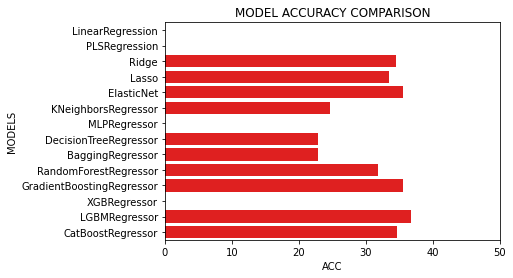

In [150]:
r = pd.DataFrame(columns=["MODELS","ACC"])
for model in models:
    name = model.__class__.__name__
    predict = model.predict(xTest)
    accuracy = r2_score(yTest, predict)
    result = pd.DataFrame([[name,accuracy*100]],columns=["MODELS","ACC"])
    r = r.append(result)
    
sns.barplot(x="ACC",y="MODELS",data=r,color="r")
plt.xlabel("ACC")
plt.xlim(0,50)
plt.title("MODEL ACCURACY COMPARISON")
plt.show()

# COMPARISON REGRESSOR FOR TRAIN VISUALIZATION

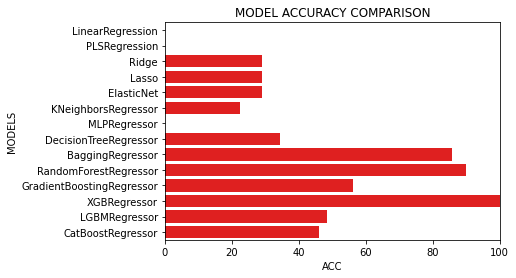

In [152]:
r = pd.DataFrame(columns=["MODELS","ACC"])
for model in models:
    name = model.__class__.__name__
    predict = model.predict(xTrain)
    accuracy = r2_score(yTrain, predict)
    result = pd.DataFrame([[name,accuracy*100]],columns=["MODELS","ACC"])
    r = r.append(result)
    
sns.barplot(x="ACC",y="MODELS",data=r,color="r")
plt.xlabel("ACC")
plt.xlim(0,100)
plt.title("MODEL ACCURACY COMPARISON")
plt.show()

# LOGISTIC REGRESSION MODELS & ERROR & TUNING & PREDICT

In [156]:
lj = LogisticRegression(solver="liblinear").fit(xTrain,yTrain)
predict = lj.predict(xTest)


print(accuracy_score(yTest,predict))
R2CV = cross_val_score(lj,xTest,yTest,cv=10).mean()
print(R2CV)
error = mean_squared_error(yTest,predict)
print(np.sqrt(error))
print("----"*30)


0.7301587301587301
0.6357142857142857
1.126872339638022
------------------------------------------------------------------------------------------------------------------------


# GAUSSIAN NAIVE BAYES MODELS & ERROR & TUNING & PREDICT

In [157]:
gnb = GaussianNB().fit(xTrain,yTrain)
predict = gnb.predict(xTest)

print(accuracy_score(yTest,predict))
R2CV = cross_val_score(gnb,xTest,yTest,cv=10).mean()
print(R2CV)
error = mean_squared_error(yTest,predict)
print(np.sqrt(error))
print("----"*30)

0.6984126984126984
0.5476190476190476
1.2661653143150793
------------------------------------------------------------------------------------------------------------------------


# KNN C MODELS & ERROR & TUNING & PREDICT

In [161]:
knnc = KNeighborsClassifier().fit(xTrain,yTrain)
predict = knnc.predict(xTest)

print(accuracy_score(yTest,predict))
R2CV = cross_val_score(knnc,xTest,yTest,cv=10).mean()
print(R2CV)
error = mean_squared_error(yTest,predict)
print(np.sqrt(error))

0.6825396825396826
0.5857142857142856
1.3743685418725535


In [159]:
params = {"n_neighbors": np.arange(1,50)}

In [160]:
cv = GridSearchCV(knnc,params,cv=10,verbose=False,n_jobs=-1).fit(xTrain,yTrain)
print(cv.best_params_)
print(cv.best_score_)

{'n_neighbors': 12}
0.5718461538461538


In [162]:
knnctuned = KNeighborsClassifier(n_neighbors=12).fit(xTrain,yTrain)
predicttuned = knnctuned.predict(xTest)

print(accuracy_score(yTest,predicttuned))
R2CVtuned = cross_val_score(knnctuned,xTest,yTest,cv=10).mean()
print(R2CVtuned)
errortuned = mean_squared_error(yTest,predicttuned)
print(np.sqrt(errortuned))
print("----"*30)

0.6825396825396826
0.5357142857142857
1.3273676061682242
------------------------------------------------------------------------------------------------------------------------


# ANN C MODELS & ERROR & TUNING & PREDICT

In [165]:
scaler = StandardScaler().fit(xTrain, yTrain)
xRTrain = scaler.transform(xTrain)
xRTest = scaler.transform(xTest)

In [167]:
mlpc = MLPClassifier().fit(xRTrain,yTrain)
predict = mlpc.predict(xRTest)

print(accuracy_score(yTest,predict))
R2CV = cross_val_score(mlpc,xRTest,yTest,cv=10).mean()
print(R2CV)
error = mean_squared_error(yTest,predict)
print(np.sqrt(error))

0.7936507936507936
0.669047619047619
1.2084359562332876


In [169]:
params = {"alpha": [0.01,0.02,0.005,0.001,0.0001],
         "hidden_layer_sizes": [(3,5),(5,3),(10,10,10),(100,200,150),(100,100,100)],
         "activation": ["relu","logistic"]}

In [170]:
cv = GridSearchCV(mlpc,params,cv=10,verbose=False,n_jobs=-1).fit(xRTrain,yTrain)
print(cv.best_params_)
print(cv.best_score_)

{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100, 200, 150)}
0.6518461538461537


In [171]:
mlpctuned = MLPClassifier(activation="relu",alpha=0.001,
                          hidden_layer_sizes=(100,200,150)).fit(xRTrain,yTrain)
predicttuned = mlpctuned.predict(xRTest)

print(accuracy_score(yTest,predicttuned))
R2CVtuned = cross_val_score(mlpctuned,xRTest,yTest,cv=10).mean()
print(R2CVtuned)
errortuned = mean_squared_error(yTest,predicttuned)
print(np.sqrt(errortuned))
print("----"*30)

0.7142857142857143
0.6523809523809523
1.247219128924647
------------------------------------------------------------------------------------------------------------------------


# REGRESSION TREES(CART) C MODELS & ERROR & TUNING & PREDICT

In [172]:
cartc = DecisionTreeClassifier(random_state=42).fit(xTrain,yTrain)
predict = cartc.predict(xTest)

print(accuracy_score(yTest,predict))
R2CV = cross_val_score(cartc,xTest,yTest,cv=10).mean()
print(R2CV)
error = mean_squared_error(yTest,predict)
print(np.sqrt(error))

0.5238095238095238
0.6047619047619048
1.558387444947959


In [173]:
params = {"max_depth":range(1,20),
         "min_samples_split":range(2,50)}

In [174]:
cv = GridSearchCV(cartc,params,cv=10,verbose=False,n_jobs=-1).fit(xTrain,yTrain)
print(cv.best_params_)
print(cv.best_score_)

{'max_depth': 3, 'min_samples_split': 2}
0.607076923076923


In [175]:
cartctuned = DecisionTreeClassifier(random_state=42,max_depth=3,
                                    min_samples_split=2).fit(xTrain,yTrain)
predicttuned = cartctuned.predict(xTest)

print(accuracy_score(yTest,predicttuned))
R2CVtuned = cross_val_score(cartctuned,xTest,yTest,cv=10).mean()
print(R2CVtuned)
errortuned = mean_squared_error(yTest,predicttuned)
print(np.sqrt(errortuned))
print("----"*30)

0.6031746031746031
0.6357142857142857
1.4907119849998598
------------------------------------------------------------------------------------------------------------------------


# RANDOM FOREST (RF) C MODELS & ERROR & TUNING & PREDICT

In [176]:
rfc = RandomForestClassifier(random_state=42).fit(xTrain,yTrain)
predict = rfc.predict(xTest)

print(accuracy_score(yTest,predict))
R2CV = cross_val_score(rfc,xTest,yTest,cv=10).mean()
print(R2CV)
error = mean_squared_error(yTest,predict)
print(np.sqrt(error))

0.6984126984126984
0.6833333333333333
1.351072472296296


In [177]:
params = {"max_depth": [2, 5, 8, 10],
          "max_features": [2, 5, 8],
          "n_estimators": [10, 500, 1000],
          "min_samples_split": [2, 5, 10]}

In [178]:
cv = GridSearchCV(rfc,params,cv=10,verbose=False,n_jobs=-1).fit(xTrain,yTrain)
print(cv.best_params_)
print(cv.best_score_)

{'max_depth': 8, 'max_features': 8, 'min_samples_split': 5, 'n_estimators': 500}
0.6946153846153845


In [179]:
rfctuned = RandomForestClassifier(random_state=42,max_depth=8,max_features=8,
                                  min_samples_split=5,n_estimators=500).fit(xTrain,yTrain)
predicttuned = rfctuned.predict(xTest)

print(accuracy_score(yTest,predicttuned))
R2CVtuned = cross_val_score(rfctuned,xTest,yTest,cv=10).mean()
print(R2CVtuned)
errortuned = mean_squared_error(yTest,predicttuned)
print(np.sqrt(errortuned))
print("----"*30)

0.7142857142857143
0.6857142857142857
1.2909944487358056
------------------------------------------------------------------------------------------------------------------------


# GBM C MODELS & ERROR & TUNING & PREDICT

In [180]:
gbmc = GradientBoostingClassifier().fit(xTrain,yTrain)
predict = gbmc.predict(xTest)

print(accuracy_score(yTest,predict))
R2CV = cross_val_score(gbmc,xTest,yTest,cv=10).mean()
print(R2CV)
error = mean_squared_error(yTest,predict)
print(np.sqrt(error))

0.6666666666666666
0.49523809523809514
1.259881576697424


In [181]:
params = {"learning_rate": [0.001,0.01,0.1,0.05],
         "max_depth": [3,5,10],
         "n_estimators": [100,300,500,1000],
         "min_samples_split":[2,5,10]}

In [ ]:
cv = GridSearchCV(gbmc,params,cv=10,verbose=False,n_jobs=-1).fit(xTrain,yTrain)
print(cv.best_params_)
print(cv.best_score_)

In [184]:
gbmctuned = GradientBoostingClassifier(learning_rate=0.01,max_depth=5,
                                      n_estimators=500,min_samples_split=5).fit(xTrain,yTrain)

predicttuned = gbmctuned.predict(xTest)

print(accuracy_score(yTest,predicttuned))
R2CVtuned = cross_val_score(gbmctuned,xTest,yTest,cv=10).mean()
print(R2CVtuned)
errortuned = mean_squared_error(yTest,predicttuned)
print(np.sqrt(errortuned))
print("----"*30)

0.6984126984126984
0.5547619047619048
1.3153549825650603
------------------------------------------------------------------------------------------------------------------------


# XGBOOST C MODELS & ERROR & TUNING & PREDICT

In [186]:
xgc = XGBClassifier(verbose=False).fit(xTrain,yTrain)
predict = xgc.predict(xTest)

print(accuracy_score(yTest,predict))
R2CV = cross_val_score(xgc,xTest,yTest,cv=10).mean()
print(R2CV)
error = mean_squared_error(yTest,predict)
print(np.sqrt(error))

[18:37:07] WARNING: ../src/learner.cc:541: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:37:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7142857142857143
[18:37:07] WARNING: ../src/learner.cc:541: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:37:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the

In [187]:
params = {"n_estimators": [100, 500, 1000, 2000],
          "subsample": [0.6, 0.8, 1.0],
          "max_depth": [3, 4, 5, 6],
          "learning_rate": [0.1, 0.01, 0.02, 0.05],
          "min_samples_split": [2, 5, 10]}

In [ ]:
cv = GridSearchCV(xgc,params,cv=10,verbose=False,n_jobs=-1).fit(xTrain,yTrain)
print(cv.best_params_)
print(cv.best_score_)

In [189]:
xgctuned = XGBClassifier(n_estimators=1000,subsample=0.8,
                        max_depth=5,learning_rate=0.01,min_samples_split=5).fit(xTrain,yTrain)
predicttuned = xgctuned.predict(xTest)

print(accuracy_score(yTest,predicttuned))
R2CVtuned = cross_val_score(xgctuned,xTest,yTest,cv=10).mean()
print(R2CVtuned)
errortuned = mean_squared_error(yTest,predicttuned)
print(np.sqrt(errortuned))
print("----"*30)

[18:44:17] WARNING: ../src/learner.cc:541: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:44:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7142857142857143
[18:44:19] WARNING: ../src/learner.cc:541: 
Parameters: { min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:44:19] WARNING: ../src/learner.cc:1061: Starting i

# LIGHTGBM C MODELS & ERROR & TUNING & PREDICT

In [190]:
lgbmc = LGBMClassifier().fit(xTrain,yTrain)
predict = lgbmc.predict(xTest)

print(accuracy_score(yTest,predict))
R2CV = cross_val_score(lgbmc,xTest,yTest,cv=10).mean()
print(R2CV)
error = mean_squared_error(yTest,predict)
print(np.sqrt(error))

0.6984126984126984
0.5761904761904761
1.391584685352615


In [191]:
params = {"n_estimators": [100, 500, 1000, 2000],
          "subsample": [0.6, 0.8, 1.0],
          "max_depth": [3, 4, 5, 6],
          "learning_rate": [0.1, 0.01, 0.02, 0.05],
          "min_child_samples": [5, 10, 20]}

In [ ]:
cv = GridSearchCV(lgbmc,params,cv=10,verbose=False,n_jobs=-1).fit(xTrain,yTrain)
print(cv.best_params_)
print(cv.best_score_)

In [195]:
lgbmctuned = LGBMClassifier(n_estimators=1000,subsample=0.8,max_depth=6,
                           learning_rate=0.02,min_child_samples=10).fit(xTrain,yTrain)
predicttuned = lgbmctuned.predict(xTest)

print(accuracy_score(yTest,predicttuned))
R2CVtuned = cross_val_score(lgbmctuned,xTest,yTest,cv=10).mean()
print(R2CVtuned)
errortuned = mean_squared_error(yTest,predicttuned)
print(np.sqrt(errortuned))
print("----"*30)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
0.6825396825396826
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly se

# CATBOOST CLASSIFIER MODELS & ERROR & TUNING & PREDICT

In [196]:
catbc = CatBoostClassifier(verbose=False).fit(xTrain,yTrain)
predict = catbc.predict(xTest)

print(accuracy_score(yTest,predict))
R2CV = cross_val_score(catbc,xTest,yTest,cv=10).mean()
print(R2CV)
error = mean_squared_error(yTest,predict)
print(np.sqrt(error))

0.6666666666666666
0.7285714285714285
1.4364860122855578


In [197]:
params = {"iterations": [200, 500],
          "learning_rate": [0.01, 0.05, 0.1],
          "depth": [3, 5, 8]}

In [198]:
cv = GridSearchCV(catbc,params,cv=10,verbose=False,n_jobs=-1).fit(xTrain,yTrain)
print(cv.best_params_)
print(cv.best_score_)

{'depth': 5, 'iterations': 200, 'learning_rate': 0.05}
0.6906153846153845


In [199]:
catbctuned = CatBoostClassifier(verbose=False,depth=5,iterations=200,
                                learning_rate=0.05).fit(xTrain,yTrain)
predicttuned = catbctuned.predict(xTest)

print(accuracy_score(yTest,predicttuned))
R2CVtuned = cross_val_score(catbctuned,xTest,yTest,cv=10).mean()
print(R2CVtuned)
errortuned = mean_squared_error(yTest,predicttuned)
print(np.sqrt(errortuned))
print("----"*30)

0.7777777777777778
0.7023809523809523
1.1818736805705576
------------------------------------------------------------------------------------------------------------------------


# COMPARISON REGRESSOR

In [200]:
modelsC = [lj,gnb,knnctuned,mlpctuned,cartctuned,rfctuned,gbmctuned,xgctuned,lgbmctuned,catbctuned]

In [202]:
for model in modelsC:
    name = model.__class__.__name__
    predict = model.predict(xTest)
    accuracy = accuracy_score(yTest, predict)
    print("-" * 28)
    print(name + ": ")
    print(f"Accuracy: {accuracy}")

----------------------------
LogisticRegression: 
Accuracy: 0.7301587301587301
----------------------------
GaussianNB: 
Accuracy: 0.6984126984126984
----------------------------
KNeighborsClassifier: 
Accuracy: 0.6825396825396826
----------------------------
MLPClassifier: 
Accuracy: 0.5873015873015873
----------------------------
DecisionTreeClassifier: 
Accuracy: 0.6031746031746031
----------------------------
RandomForestClassifier: 
Accuracy: 0.7142857142857143
----------------------------
GradientBoostingClassifier: 
Accuracy: 0.6984126984126984
----------------------------
XGBClassifier: 
Accuracy: 0.7142857142857143
----------------------------
LGBMClassifier: 
Accuracy: 0.6825396825396826
----------------------------
CatBoostClassifier: 
Accuracy: 0.7777777777777778


# COMPARISON REGRESSOR VISUALIZATION

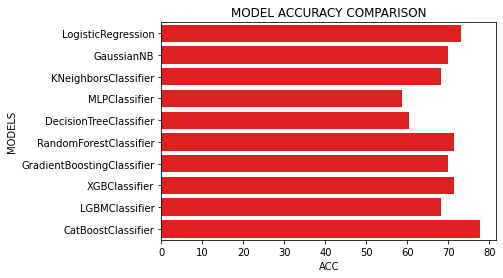

In [204]:
r = pd.DataFrame(columns=["MODELS","ACC"])

for model in modelsC:
    name = model.__class__.__name__
    predict = model.predict(xTest)
    accuracy = accuracy_score(yTest, predict)
    result = pd.DataFrame([[name,accuracy*100]],columns=["MODELS","ACC"])
    r = r.append(result)
    
sns.barplot(x="ACC",y="MODELS",data=r,color="r")
plt.xlabel("ACC")
plt.title("MODEL ACCURACY COMPARISON")
plt.show()